# 6.2 - Exploring Relationships

### Contents list:
1. Import libraries and data
2. Exploratory visualizations
    - Correlation matrix heatmap
    - Scatterplots
    - Pair plot
    - Categorical plot
3. Revisit key questions
4. Define hypotheses

### 1. Import libraries and data

In [10]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [11]:
# declare path as variable

path = r'/Users/dekstrom/Documents/CareerFoundry/Achievement 6'

In [12]:
# import WDI_CLEANED.csv as main dataframe

df_clean = pd.read_csv(os.path.join(path,'01 Data','Prepared Data','WDI_CLEANED.csv'), index_col = False)

### 3. Exploratory visualizations

#### Create a correlation matrix heatmap (colored). Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

In [13]:
# undo displayed column limit

pd.set_option('display.max_columns', None)

In [14]:
# reduce number of columns for correlation matrix

key_vars = ['Avg child working hours', 'Employed children %', 'CO2 emissions', 'Social insurance coverage %', 'Current health expenditure %', 'Bachelor+ education %', 'Electricity prod - oil, gas & coal %', 'Electricity prod - renewables %', 'GDP per capita', 'GNI per capita', 'Income share - top 10%', 'Internet users %', 'Literacy rate', 'Military expenditure %', 'Renewable electricity output %', 'Suicide mortality rate', 'Alcohol consumption per capita']            

In [15]:
# create df for correlation matrix from key_vars

df_corr = df_clean[key_vars]

In [16]:
# create correlation matrix from key_vars

df_corr.corr()

Avg child working hours  \
Avg child working hours                              1.000000   
Employed children %                                 -0.121430   
CO2 emissions                                        0.016582   
Social insurance coverage %                         -0.447278   
Current health expenditure %                        -0.121441   
Bachelor+ education %                               -0.092872   
Electricity prod - oil, gas & coal %                -0.134174   
Electricity prod - renewables %                      0.223926   
GDP per capita                                      -0.101419   
GNI per capita                                      -0.095815   
Income share - top 10%                               0.314995   
Internet users %                                    -0.124227   
Literacy rate                                        0.047938   
Military expenditure %                              -0.087288   
Renewable electricity output %                       0.111888   
Suicide mortality rate                              -0.320660   
Alcohol consumption per capita                       0.020154   

                                      Employed children %  CO2 emissions  \
Avg child working hours                         -0.121430       0.016582   
Employed children %                              1.000000      -0.286050   
CO2 emissions                                   -0.286050       1.000000   
Social insurance coverage %                     -0.250633       0.128225   
Current health expenditure %                    -0.057071       0.108517   
Bachelor+ education %                           -0.439118       0.174454   
Electricity prod - oil, gas & coal %            -0.120671       0.093927   
Electricity prod - renewables %                 -0.119192      -0.018431   
GDP per capita                                  -0.494318       0.107791   
GNI per capita                                  -0.496396       0.135220   
Income share - top 10%                          -0.273916      -0.013465   
Internet users %                                -0.465383       0.113386   
Literacy rate                                   -0.680517       0.119296   
Military expenditure %                          -0.129431       0.020112   
Renewable electricity output %                   0.059517      -0.098279   
Suicide mortality rate                          -0.008830       0.066853   
Alcohol consumption per capita                  -0.246863       0.095649   

                                      Social insurance coverage %  \
Avg child working hours                                 -0.447278   
Employed children %                                     -0.250633   
CO2 emissions                                            0.128225   
Social insurance coverage %                              1.000000   
Current health expenditure %                             0.316377   
Bachelor+ education %                                    0.561145   
Electricity prod - oil, gas & coal %                     0.123539   
Electricity prod - renewables %                         -0.201313   
GDP per capita                                           0.431429   
GNI per capita                                           0.444545   
Income share - top 10%                                  -0.537916   
Internet users %                                         0.429022   
Literacy rate                                            0.432211   
Military expenditure %                                   0.271620   
Renewable electricity output %                          -0.242413   
Suicide mortality rate                                   0.426611   
Alcohol consumption per capita                           0.482690   

                                      Current health expenditure %  \
Avg child working hours                                  -0.121441   
Employed children %                                      -0.057071   
CO2 emissions                                

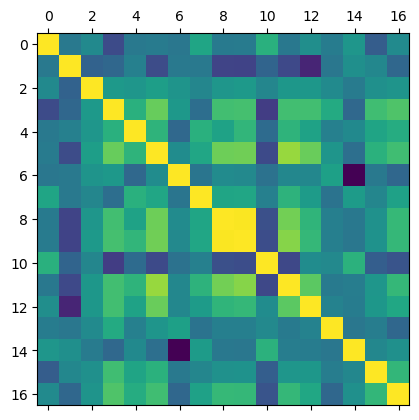

In [17]:
# create a correlation heatmap from key_corr

plt.matshow(df_corr.corr())
plt.show()

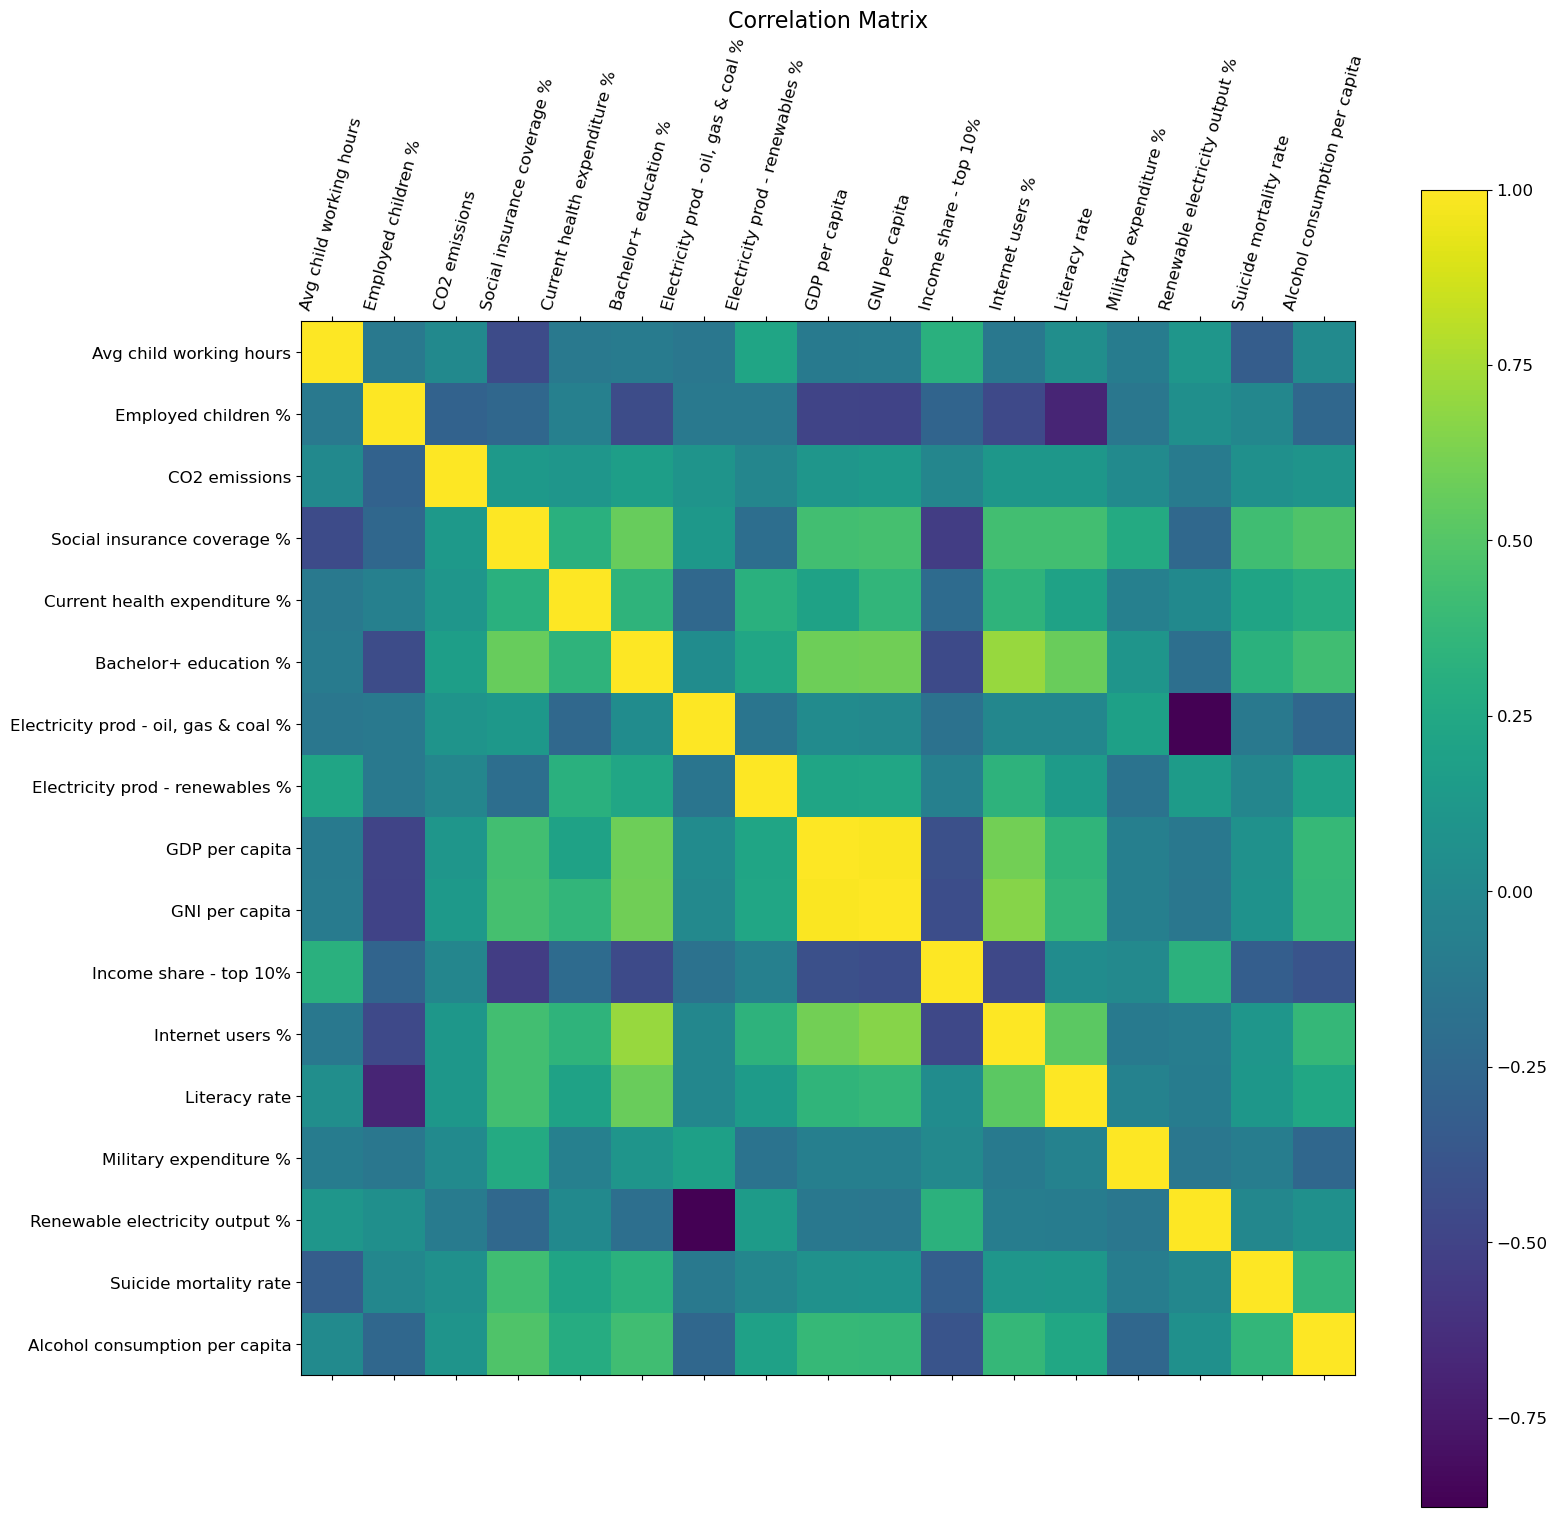

In [18]:
# add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(17, 17)) # figure size 
plt.matshow(df_corr.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_corr.shape[1]), df_corr.columns, fontsize=12, rotation=75) # x axis labels
plt.yticks(range(df_corr.shape[1]), df_corr.columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=12) # add font size
plt.title('Correlation Matrix', fontsize=16) # add title
plt.savefig("/Users/dekstrom/Documents/CareerFoundry/Achievement 6/04 Visualizations/corr_heatmap_matplotlib.png") # save figure

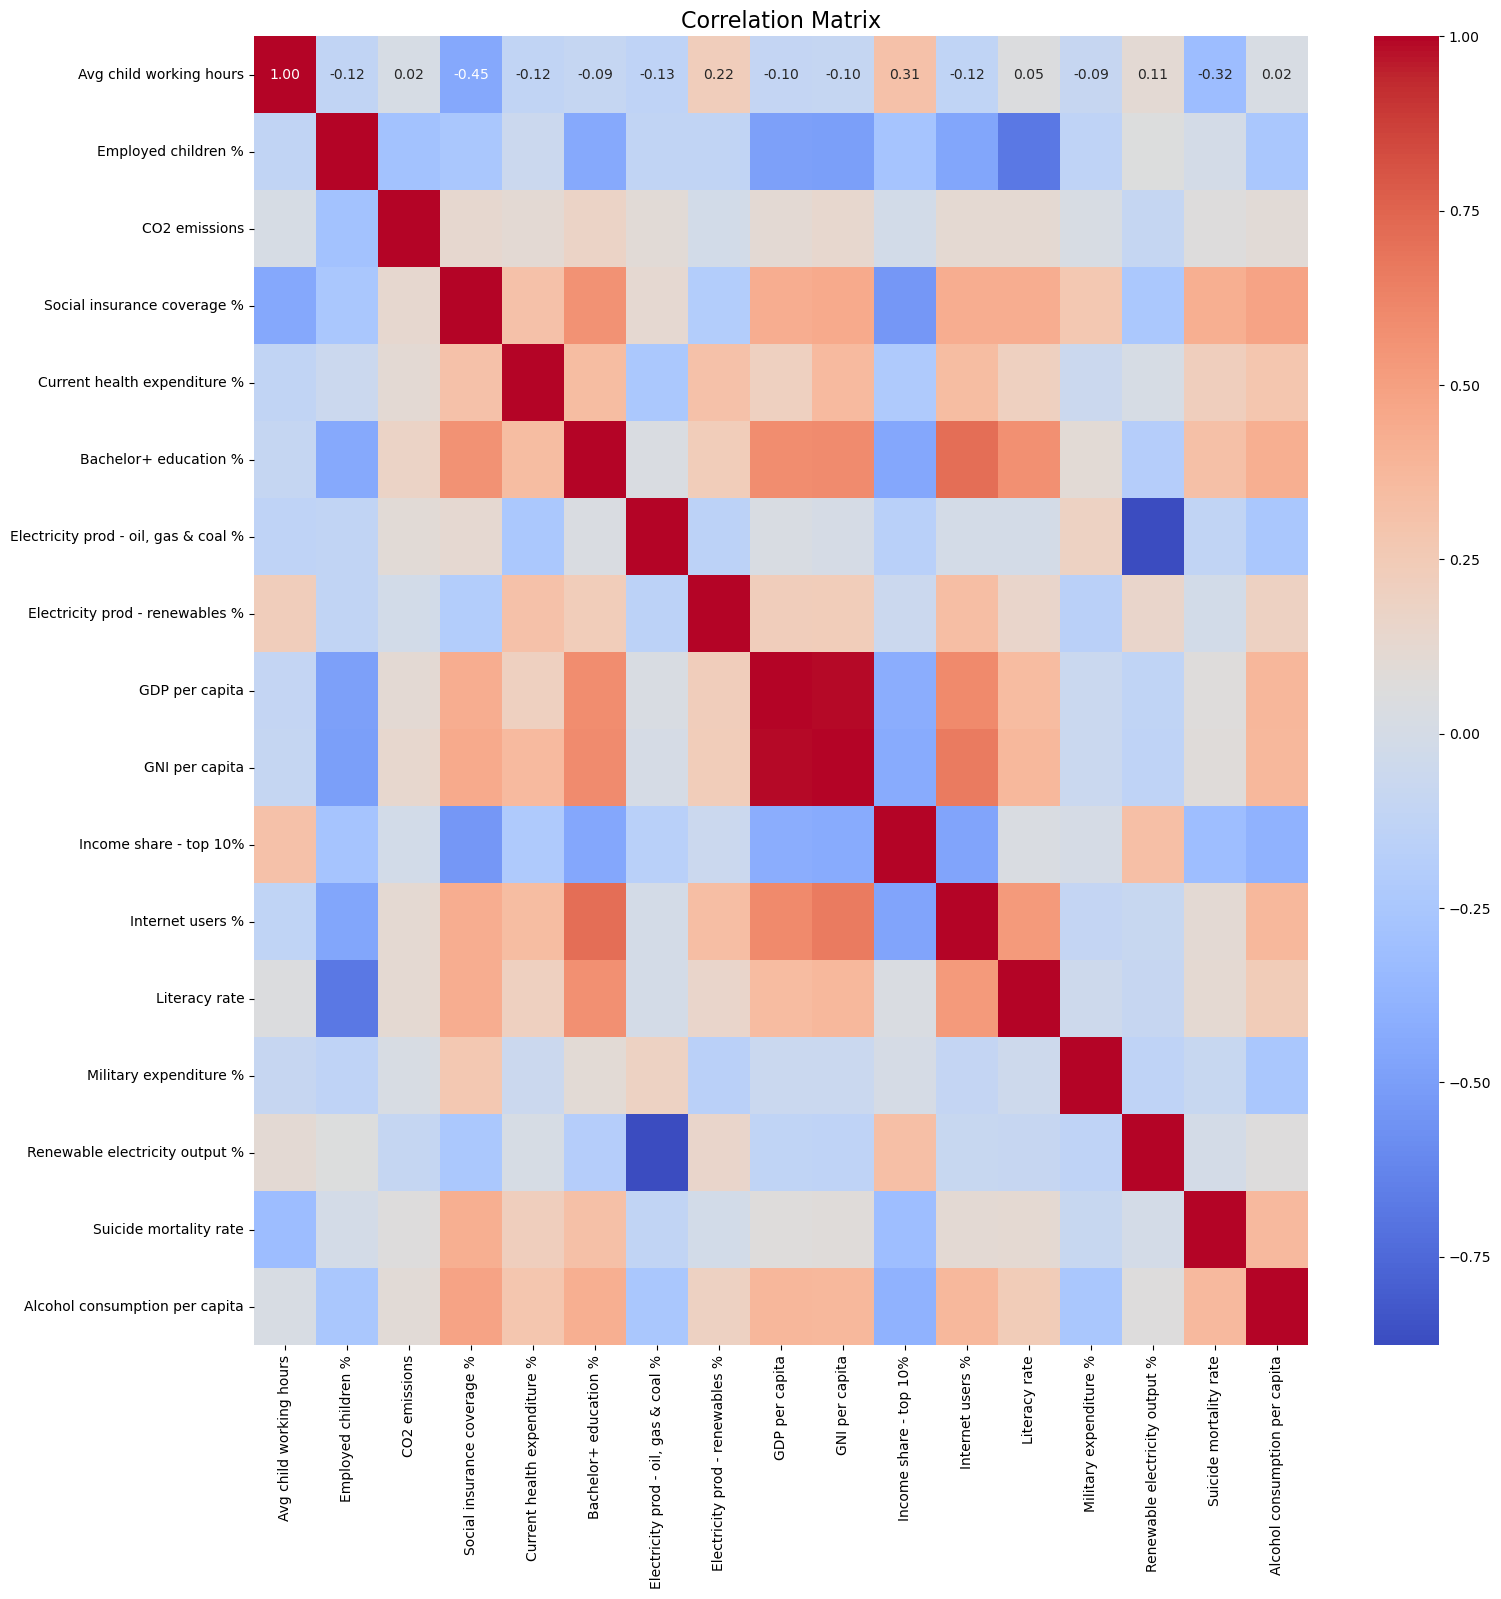

In [19]:
# heatmap with seaborn

f,ax = plt.subplots(figsize=(17,17))
corr = sns.heatmap(df_corr.corr(), annot = True, fmt = '.2f', cmap='coolwarm', ax = ax) # annotate matrix with correlation figures
ax.set_title('Correlation Matrix', fontsize = 16) # add a title
f.savefig("/Users/dekstrom/Documents/CareerFoundry/Achievement 6/04 Visualizations/corr_heatmap_seaborn.png") # save figure

#### Discussion
The figures in the plot indicate the correlation coefficients for the variables on the intersecting row and column. The coefficients range from -1 to 1 and represent how correlated the variables are. A coefficient close to 0 means there little to know relationship betweent the vsribles. As the coefficient approaches 1, both variables increase (or decrease) in tandem with each other. As the coefficient approaches -1, one variable increases as the other decreases.

### Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships. Discuss the output in a markdown cell.

In [20]:
# find correlation coefficient for GNI per capita & GDP per capita

df_clean['GNI per capita'].corr(df_clean['GDP per capita'])

0.9891109106465907

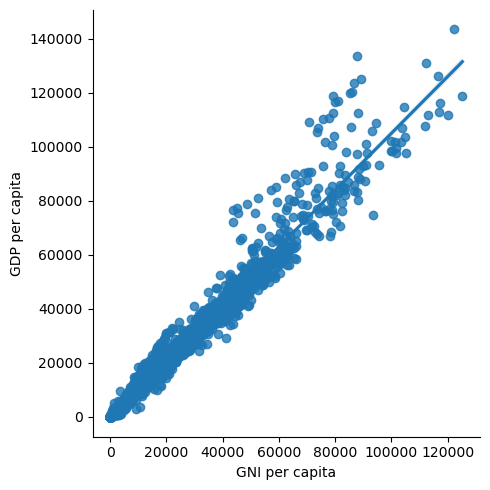

In [21]:
# create scatterplot for GNI per capita & GDP per capita

sctr_gni_gdp = sns.lmplot(x = 'GNI per capita', y = 'GDP per capita', data = df_clean)
sctr_gni_gdp.savefig("/Users/dekstrom/Documents/CareerFoundry/Achievement 6/04 Visualizations/sctr_gni_gdp.png")

#### Discussion
GNI and GDP have a strong positive correlation meaning as GDP increases, so does GNI. This is what we would expect as both GNI and GDP are different approaches to measuring a country's economy. GDP looks at total economic production while GNI includes a measure of total income for all residents.

In [22]:
# find correlation coefficient for Bachelor+ education % & Internet users %

df_clean['Bachelor+ education %'].corr(df_clean['Internet users %'])

0.7111628147696553

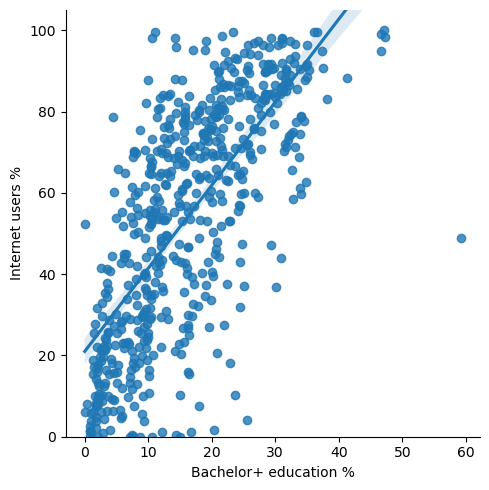

In [23]:
# create scatterplot for Bachelor+ education % & Internet users %

sctr_edu_net = sns.lmplot(x = 'Bachelor+ education %', y = 'Internet users %', data = df_clean)
plt.ylim(0, 105)
sctr_edu_net.savefig("/Users/dekstrom/Documents/CareerFoundry/Achievement 6/04 Visualizations/sctr_edu_net.png")

#### Discussion
% of Bachelor or equivalent education attainment and % of internet users have a strong positive correlation. Both factors could be influenced by the overall wealth and development of a nation or some other confounding variable as opposed to being causal. Also it, looks like the variables maybe have more of an exponential vs linear relationship as it appears that the % of internet users rises quickly and then plateaus. There is one extreme outlier meaning a country in one year had ~60% bachelor education attainment but only 50% internet usage. This could be an error but we'll need to investigate to confirm.

In [24]:
# find correlation coefficient for GNI per capita & Internet users %

df_clean['GNI per capita'].corr(df_clean['Internet users %'])

0.6555439583415977

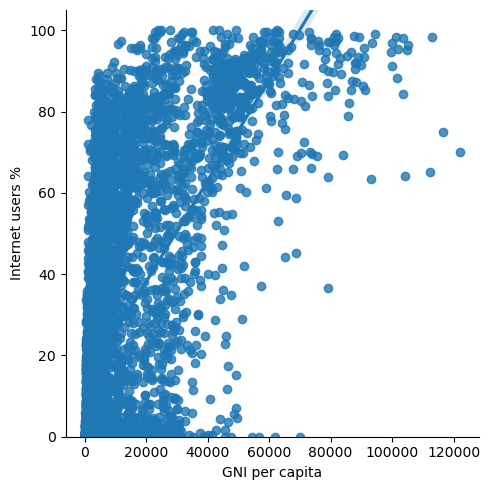

In [25]:
# create scatterplot for GNI per capita & Internet users %

sctr_gni_net = sns.lmplot(x = 'GNI per capita', y = 'Internet users %', data = df_clean)
plt.ylim(0, 105)
sctr_gni_net.savefig("/Users/dekstrom/Documents/CareerFoundry/Achievement 6/04 Visualizations/sctr_gni_net.png")

#### Discussion
GNI and % of internet users have a strong positive correlation. The clustering looks similar to the previous one which helps make the case that internet users and is somewhat a product of (or a precedent of) national wealth. It might help the argument that national wealth comes from more modern and tech-enabled industries. Perhaps the low internet outliers correspond with oil producing countries who's GNI may be less influenced by internet technology.

In [26]:
# find correlation coefficient for Employed children & Literacy rate

df_clean['Employed children %'].corr(df_clean['Literacy rate'])

-0.6805167246291668

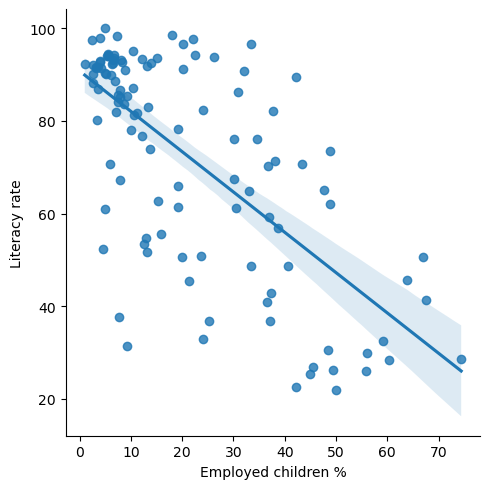

In [27]:
# create scatterplot for Employed children % & Literacy rate

sctr_chldemp_lit = sns.lmplot(x = 'Employed children %', y = 'Literacy rate', data = df_clean)
sctr_chldemp_lit.savefig("/Users/dekstrom/Documents/CareerFoundry/Achievement 6/04 Visualizations/sctr_chldemp_lit.png")

#### Discussion
Employed children % & literacy rate have a strong negative correlation. This may help make the case that high child employment rate means that focus is taken away from education and therefore results in a low literacy rate. The wide range of clusters however mean there are many exceptions to this theory. All we know at this point is that variables are inversely correlated.

In [74]:
# find correlation coefficient for Social insurance coverage % and Income share - top 10%

df_clean['Social insurance coverage %'].corr(df_clean['Income share - top 10%'])

-0.5379159294111552

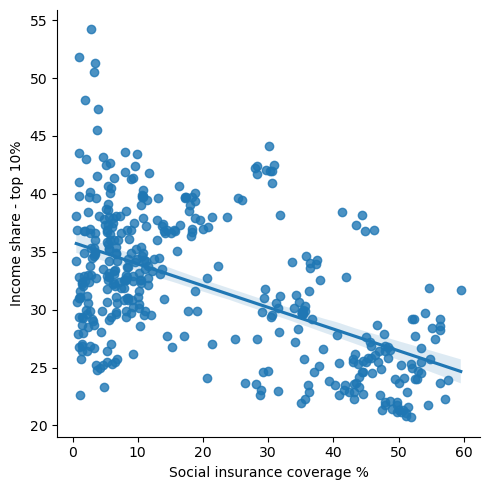

In [29]:
# create scatterplot for Social insurance coverage % and Income share - top 10%

sctr_soc_top10 = sns.lmplot(x = 'Social insurance coverage %', y = 'Income share - top 10%', data = df_clean)
sctr_soc_top10.savefig("/Users/dekstrom/Documents/CareerFoundry/Achievement 6/04 Visualizations/sctr_soc_top10.png")

#### Discussion
Social insurance coverage % and income share held by the top 10% have a moderately strong negative correlation - as social insurance coverage increases, income share held by top 10% is likely to decrease. This suggests that a society that prioritizes social welfare and socialist leaning programs, trends to have low income inequality as well. That being said, there are seem to be multiple trends and likely multiple explanations for this relationship. I'm interested in digging into this relationship further.

In [30]:
# find correlation coefficient for Income share - top 10% and Alcohol consumption per capita

df_clean['Alcohol consumption per capita'].corr(df_clean['Income share - top 10%'])

-0.3864462908115444

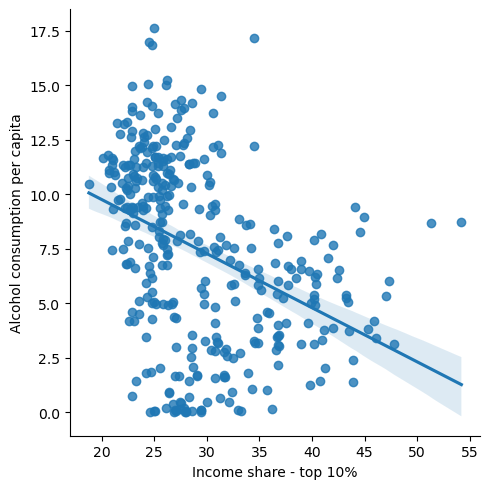

In [31]:
# create scatterplot for Income share - top 10% and Alcohol consumption per capita

sctr_top10_alc = sns.lmplot(x = 'Income share - top 10%', y = 'Alcohol consumption per capita', data = df_clean)
sctr_top10_alc.savefig("/Users/dekstrom/Documents/CareerFoundry/Achievement 6/04 Visualizations/sctr_top10_alc.png")

#### Discussion
Employed children % & literacy rate have a moderate negative correlation. It seesms that alcohol consumption occurs in highly equal and unequal income distributions. This relationship likely has many confounding variables including political structure and religious and cultural norms.

### Create a pair plot of the entire data set. Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

In [32]:
# hide future warnings

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

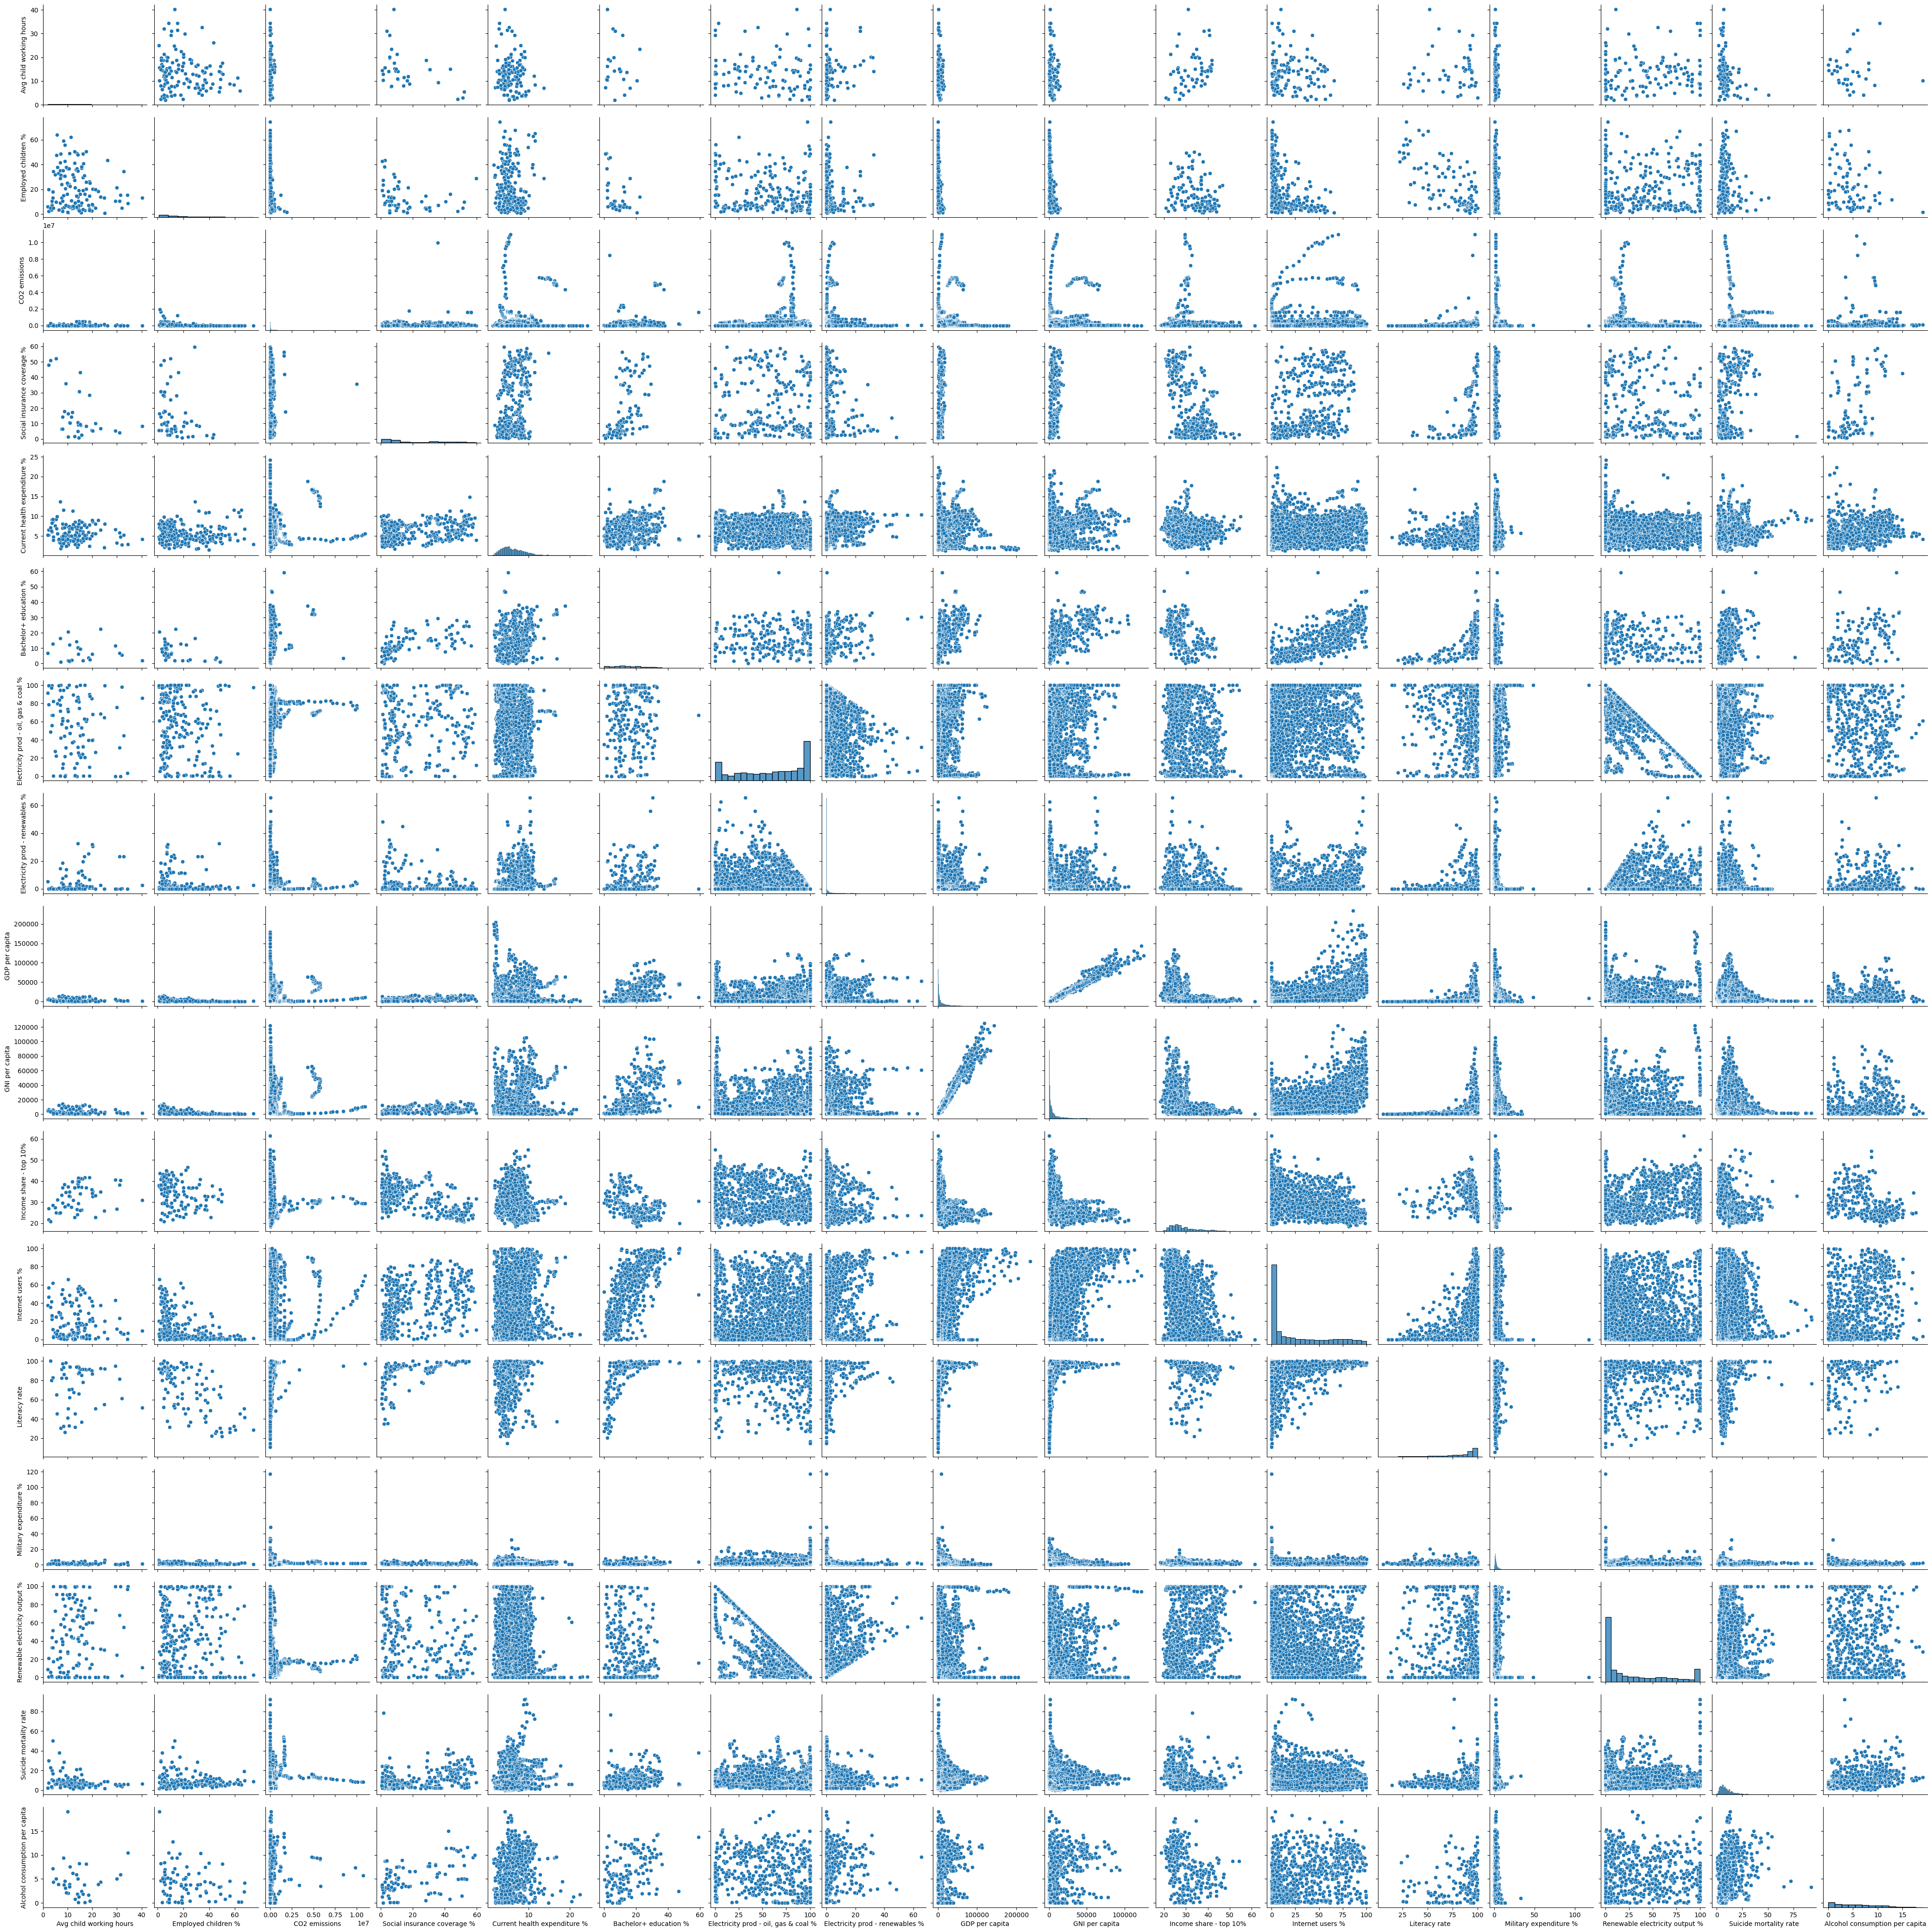

In [33]:
# create a pair plot 

pairplot = sns.pairplot(df_corr)

In [34]:
# save pair plot

pairplot.savefig("/Users/dekstrom/Documents/CareerFoundry/Achievement 6/04 Visualizations/pairplot.png")

#### Discussion
The scatterplots take on a wide variety of clusters which makes me realize how inadequate a simple correlation coefficient is at helping iluminate the relationships between these variables. I'm very interested in the relationship between CO2 emissions and multiple variables including internet users because there seems to be multiple distinct trends happening. Do these trends differ across certain years or certain countries? I'm also intersted in suicide mortality vs GDP, GNI and internet users as well as electricity production from renewables against GDP because these relationships cluster into interesting shapes.

### Create a categorical plot and interpret the results.

In [35]:
df_clean.columns

Index(['Country Name', 'Country Code', 'Year', 'Income Grouping',
       'Top religion', 'National income', 'Agricultural land %',
       'Alternative & nuclear energy use %', 'Armed forces personnel %',
       'Avg child working hours', 'Birth rate', 'Government debt %',
       'Employed children %', 'Children out of school %', 'CO2 emissions',
       'Compulsory education duration', 'Social insurance coverage %',
       'Current education expenditure %', 'Current health expenditure %',
       'Death rate', 'Bachelor+ education %', 'Electricity prod - coal %',
       'Electricity prod - hydroelectric %',
       'Electricity prod - natural gas %', 'Electricity prod - nuclear %',
       'Electricity prod - oil %', 'Electricity prod - oil, gas & coal %',
       'Electricity prod - renewables %', 'GDP', 'GDP growth %',
       'GDP per capita', 'GNI', 'GNI per capita', 'Income share - fourth 20%',
       'Income share - top 10%', 'Income share - top 20%',
       'Income share - bottom 10%'

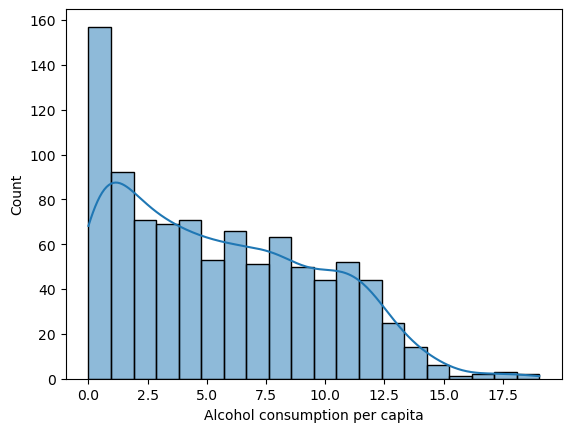

In [36]:
# create histogram to to determine categories for Alcohol consumption per capita

sns.histplot(df_clean['Alcohol consumption per capita'], bins = 20, kde = True)
plt.savefig("/Users/dekstrom/Documents/CareerFoundry/Achievement 6/04 Visualizations/hist_alc.png")

In [37]:
# create categories for Alcohol consumption per capita

df_clean.loc[(df_clean['Alcohol consumption per capita'] == 0), 'Alcohol consumption'] = 'None'
df_clean.loc[(df_clean['Alcohol consumption per capita'] > 0) & (df_clean['Alcohol consumption per capita'] <= 5), 'Alcohol consumption'] = 'Low'
df_clean.loc[(df_clean['Alcohol consumption per capita'] > 5) & (df_clean['Alcohol consumption per capita'] <= 10), 'Alcohol consumption'] = 'Medium'
df_clean.loc[df_clean['Alcohol consumption per capita'] > 10, 'Alcohol consumption'] = 'High'

In [38]:
# check value counts

df_clean['Alcohol consumption'].value_counts()

Alcohol consumption
nan       13016
Low         450
Medium      292
High        172
None         22
Name: count, dtype: int64

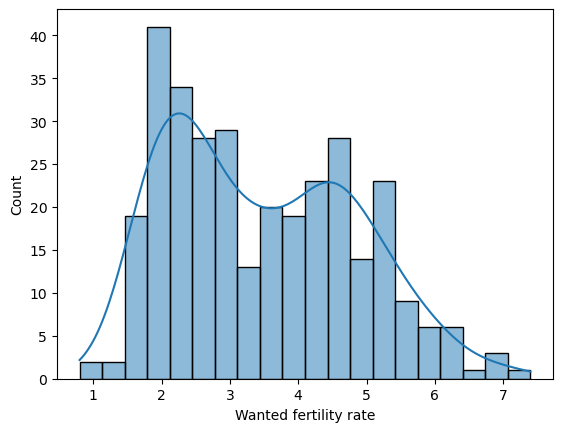

In [39]:
# create histogram to to determine categories for Wanted fertility rate

sns.histplot(df_clean['Wanted fertility rate'], bins = 20, kde = True)
plt.savefig("/Users/dekstrom/Documents/CareerFoundry/Achievement 6/04 Visualizations/hist_fert.png")

In [40]:
# create categories for Wanted fertility rate

df_clean.loc[(df_clean['Wanted fertility rate'] <= 3), 'Fertility grouping'] = 'Low fertility'
df_clean.loc[(df_clean['Wanted fertility rate'] > 3) & (df_clean['Wanted fertility rate'] <= 5), 'Fertility grouping'] = 'Med fertility'
df_clean.loc[df_clean['Wanted fertility rate'] > 5, 'Fertility grouping'] = 'High fertility'

In [41]:
# check value counts

df_clean['Fertility grouping'].value_counts()

Fertility grouping
nan               13631
Low fertility       148
Med fertility       124
High fertility       49
Name: count, dtype: int64

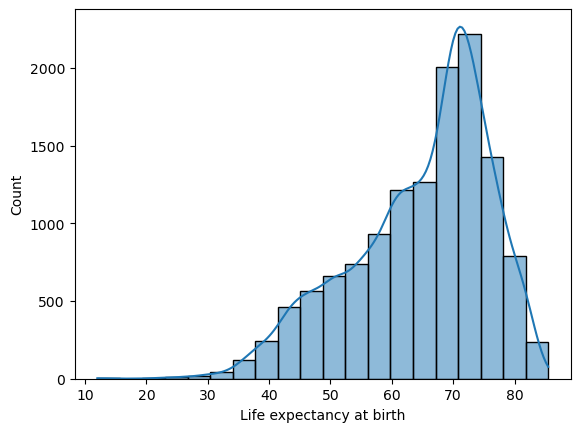

In [42]:
# create histogram to to determine categories for Life expectancy at birth

sns.histplot(df_clean['Life expectancy at birth'], bins = 20, kde = True)
plt.savefig("/Users/dekstrom/Documents/CareerFoundry/Achievement 6/04 Visualizations/hist_lifexpec.png")

In [43]:
# create categories for Life expectancy at birth

df_clean.loc[(df_clean['Life expectancy at birth'] < 50), 'Life expectancy grouping'] = 'Low'
df_clean.loc[(df_clean['Life expectancy at birth'] >= 50) & (df_clean['Life expectancy at birth'] < 80), 'Life expectancy grouping'] = 'Medium'
df_clean.loc[df_clean['Life expectancy at birth'] >= 80, 'Life expectancy grouping'] = 'High '

In [44]:
# check value counts

df_clean['Life expectancy grouping'].value_counts()

Life expectancy grouping
Medium    10670
Low        1676
nan        1000
High        606
Name: count, dtype: int64

In [45]:
# check df_clean

df_clean.shape

(13952, 58)

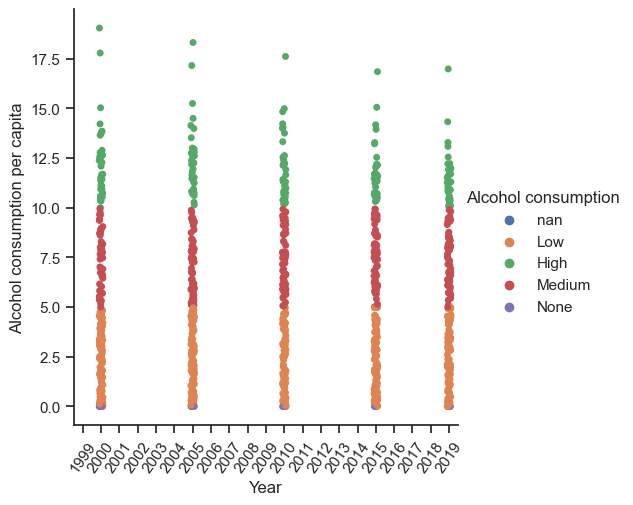

In [53]:
# create categorical plot in seaborn using the alchohol groupings

sns.set(style="ticks")
g = sns.catplot(x='Year', y='Alcohol consumption per capita', hue='Alcohol consumption', data=df_clean[(df_clean['Year'] > 1998) & (df_clean['Year'] < 2020)])
g.set_xticklabels(rotation=55)
g.savefig("/Users/dekstrom/Documents/CareerFoundry/Achievement 6/04 Visualizations/catplt_alc.png")

#### Discussion
This category plot mainly makes the case that the high mark for alchohol consumption as shifted down over the past couple decades

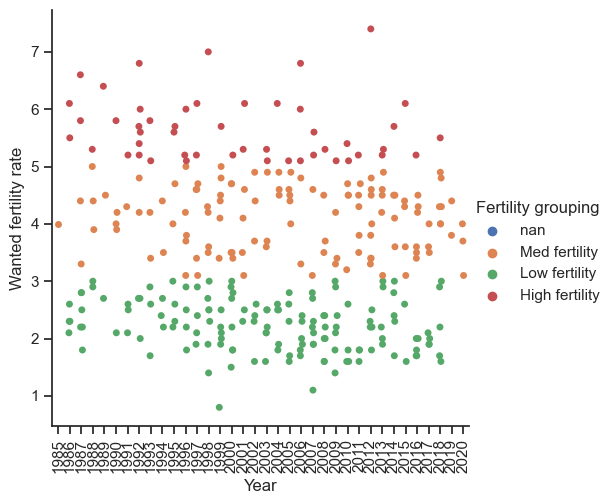

In [47]:
# create categorical plot in seaborn using the fertility groupings

sns.set(style="ticks")
g = sns.catplot(x='Year', y='Wanted fertility rate',  hue='Fertility grouping', data=df_clean[(df_clean['Year'] > 1984) & (df_clean['Year'] < 2021)])
g.set_xticklabels(rotation=90)
g.savefig("/Users/dekstrom/Documents/CareerFoundry/Achievement 6/04 Visualizations/catplt_fert.png")

#### Discussion
This category plot shows a general and subtle increase in the amount of women who have low amount of wanted births over time yet there remains few instances of high wanted births that don't seem to be influenced by the overall trend and remain across the time period.

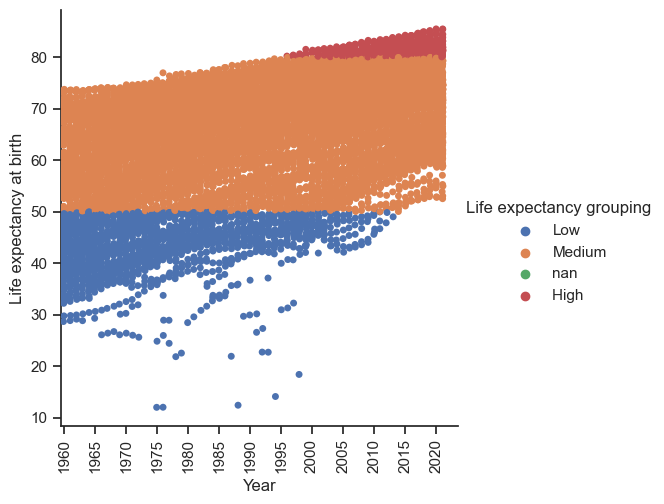

In [48]:
# create categorical plot in seaborn using the Life expectancy grouping and set labels to be less dense

sns.set(style="ticks")
g = sns.catplot(x='Year', y='Life expectancy at birth',  hue='Life expectancy grouping', data=df_clean)
ticks = g.ax.get_xticks()
g.set_xticklabels(rotation=90)
new_ticks = ticks[::5]
new_labels = [label if tick % 5 == 0 else '' for tick, label in enumerate(g.ax.get_xticklabels())]
g.ax.set_xticks(new_ticks)
g.savefig("/Users/dekstrom/Documents/CareerFoundry/Achievement 6/04 Visualizations/catplt_lifexpec.png")

#### Discussion
This category plot is fascinating in its consistency. It suggests that the high end of life expetancy across the world has very steadily increased year over year. The steadiness of the increase makes me suspicious that this might be a result of the way the variable is measured / reported as opposed to a reflection of the actual life expectancy. I'll have to investigate. Also interesting is the low end of life expectancy. The low end too has increased steadily but has many more outliers. Perhaps these indicate events (war, genocide, epidemics, etc) that may have temporarily dragged the life expectancy down in certain regions.

### 3. Revisit key questions

In [49]:
# define energy-related variables

energy_vars = ['CO2 emissions', 'Electricity prod - hydroelectric %', 'Electricity prod - nuclear %', 'Electricity prod - oil, gas & coal %','Electricity prod - renewables %']

In [50]:
# create energy-related correlation matrix

df_clean[energy_vars].corr()

CO2 emissions  \
CO2 emissions                              1.000000   
Electricity prod - hydroelectric %        -0.135517   
Electricity prod - nuclear %               0.112277   
Electricity prod - oil, gas & coal %       0.093927   
Electricity prod - renewables %           -0.018431   

                                      Electricity prod - hydroelectric %  \
CO2 emissions                                                  -0.135517   
Electricity prod - hydroelectric %                              1.000000   
Electricity prod - nuclear %                                   -0.173114   
Electricity prod - oil, gas & coal %                           -0.897929   
Electricity prod - renewables %                                -0.016901   

                                      Electricity prod - nuclear %  \
CO2 emissions                                             0.112277   
Electricity prod - hydroelectric %                       -0.173114   
Electricity prod - nuclear %                              1.000000   
Electricity prod - oil, gas & coal %                     -0.197737   
Electricity prod - renewables %                          -0.001813   

                                      Electricity prod - oil, gas & coal %  \
CO2 emissions                                                     0.093927   
Electricity prod - hydroelectric %                               -0.897929   
Electricity prod - nuclear %                                     -0.197737   
Electricity prod - oil, gas & coal %                              1.000000   
Electricity prod - renewables %                                  -0.146935   

                                      Electricity prod - renewables %  
CO2 emissions                                               -0.018431  
Electricity prod - hydroelectric %                          -0.016901  
Electricity prod - nuclear %                                -0.001813  
Electricity prod - oil, gas & coal %                        -0.146935  
Electricity prod - renewables %                              1.000000

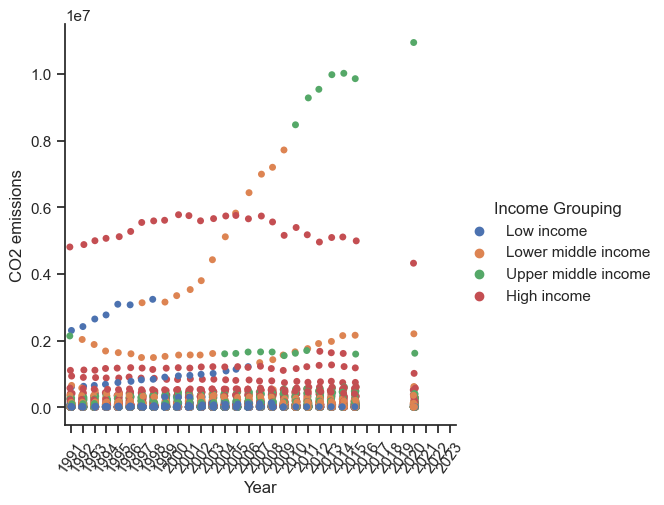

In [58]:
# create categorical plot of CO2 emissions using income groupings

sns.set(style="ticks")
g = sns.catplot(x='Year', y='CO2 emissions', hue='Income Grouping', data=df_clean[df_clean['Year'] > 1990])
g.set_xticklabels(rotation=55)
g.savefig("/Users/dekstrom/Documents/CareerFoundry/Achievement 6/04 Visualizations/catplt_co2_income.png")

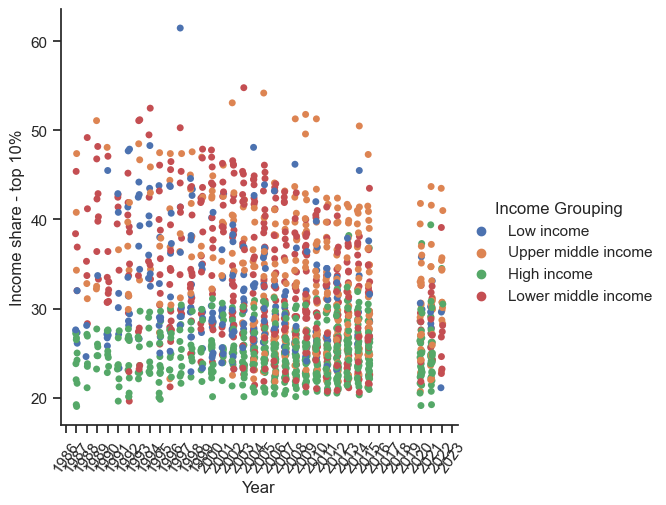

In [62]:
# create categorical plot of income share - top 10% by income grouping

sns.set(style="ticks")
g = sns.catplot(x='Year', y='Income share - top 10%', hue='Income Grouping', data=df_clean[df_clean['Year'] > 1985])
g.set_xticklabels(rotation=55)
g.savefig("/Users/dekstrom/Documents/CareerFoundry/Achievement 6/04 Visualizations/catplt_top10_income.png")

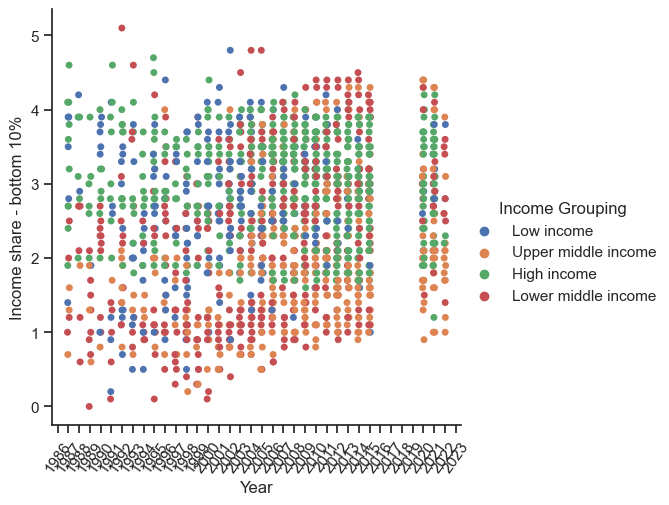

In [64]:
# create categorical plot of income share - bottom 10% by income grouping

sns.set(style="ticks")
g = sns.catplot(x='Year', y='Income share - bottom 10%', hue='Income Grouping', data=df_clean[df_clean['Year'] > 1985])
g.set_xticklabels(rotation=55)
g.savefig("/Users/dekstrom/Documents/CareerFoundry/Achievement 6/04 Visualizations/catplt_bot10_income.png")

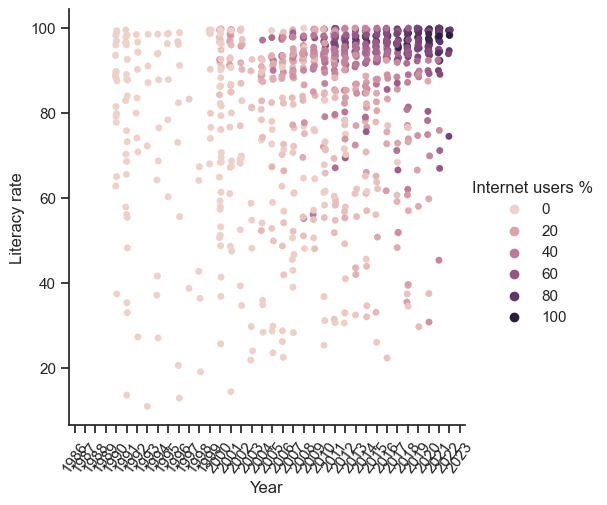

In [69]:
# create categorical plot of literacy rate by internet users %

sns.set(style="ticks")
g = sns.catplot(x='Year', y='Literacy rate', hue='Internet users %', data=df_clean[df_clean['Year'] > 1985])
g.set_xticklabels(rotation=55)
g.savefig("/Users/dekstrom/Documents/CareerFoundry/Achievement 6/04 Visualizations/catplt_net_lit.png")

In [73]:
# create expenditure correlation matrix

df_clean[['Military expenditure %', 'Social insurance coverage %', 'Current education expenditure %', 'Current health expenditure %']].corr()

Military expenditure %  \
Military expenditure %                         1.000000   
Social insurance coverage %                    0.271620   
Current education expenditure %               -0.230507   
Current health expenditure %                  -0.057080   

                                 Social insurance coverage %  \
Military expenditure %                              0.271620   
Social insurance coverage %                         1.000000   
Current education expenditure %                     0.210143   
Current health expenditure %                        0.316377   

                                 Current education expenditure %  \
Military expenditure %                                 -0.230507   
Social insurance coverage %                             0.210143   
Current education expenditure %                         1.000000   
Current health expenditure %                            0.224571   

                                 Current health expenditure %  
Military expenditure %                              -0.057080  
Social insurance coverage %                          0.316377  
Current education expenditure %                      0.224571  
Current health expenditure %                         1.000000

#### Discussion

##### 1. How does energy production source correlate with CO2 emissions across income grouping?
- Electricity production across different sources all correlate pretty weakly with CO2 emissions. CO2 emissions over time have an interesting trend for seemingly two countries. One country (likely the US) who's income has remained high since 1980, has been the historic leader in C02 emissions until ~2005 when another country (likely China) surpassed US CO2 emissions. Interestingly, this country's CO2 emissions have increased steadily as their income grouping has too from low to upper middle.

##### 2. How does income share held by different portions of the population correlate with overall income grouping? How has this changed over time? Does this interact meaningfully with GDP per capita or literacy rate?
- Income share held by the top 10% of society overall has decreased globally over time. Interestingly, the most income unequal countries after ~2005 are upper middle, not high, income countries. The trend for the share held by the bottom 10% is a bit more consistent over time however there was an increase in the income share held by the bottom 10% for number of low income countries starting around 2009. Perhaps the aftermath of the global financial crisis resulted in a greater overall number of low income countries or perhaps economic development around the world resulted in larger numbers of low income residents growing their wealth substantially around this time.

##### 3. Is there a correlation between internet usage and literacy rate? Has the strength of the correlation changed over time?
- Internet usage and literacy rate are highly correlated and have only become more correlated over time. For example, when internet users % ramps up around 2003, the highest internet using country has around 40% usage and much of the world still has a literacy rate under 90%. By 2022, nearly all countries have over 80% internet usage and over 95% literacy rate.

##### 4. Does a higher average working hours of children correlate with lower literacy rates and educational attainment?
- It is true that a higher percentage child labor correlates with lower literacy rates.

##### 5. How does military expenditure as a percentage of GDP impact social insurance coverage and health expenditure?
- Military expenditure has weak positive correlation with social insurance coverage.




### 4. Define hypotheses

##### 1. Improved literacy rate is a byproduct of internet access and usage. If a country has a high % of the population who use the internet, it is more likely to have a high literacry rate. Both literacy rate and internet usage are likely to be higher in more recent years than in earlier years.

##### 2. Working children have less time to focus on education. If a country has a high % of children who are employed or a high number of hours worked by children, it is more likely to have a low literacy rate.

##### 3. A society that spends a higher perentage of its GDP on social insurance coverage, is likely to have a more equal society measured by the % of income held by the top 10% of the population.

##### 4. Life expectancy has gone up globally over the past 60+ years. A country is likely to have a higher overall life expectancy in recent than in earlier years. Outside of major catastrophic events, the average life expectancy will continue to rise steadily over the next decade.